<h2> Machine Learning for Stocks</h2>

Step:1 Getting some historical data

Libraries or Modules:

Yahoo Finance module.

Create charts.

handle dataframes - Pandas

We need datetime functions

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import date, time

#install Yahoo Finance Libraries
try:
  import yfinance
except:
  !pip install -q yfinance
  import yfinance

try:
  import yahoofinancials
except:
  !pip install -q yahoofinancials
  import yahoofinancials

import yfinance as yf
from yahoofinancials import YahooFinancials

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


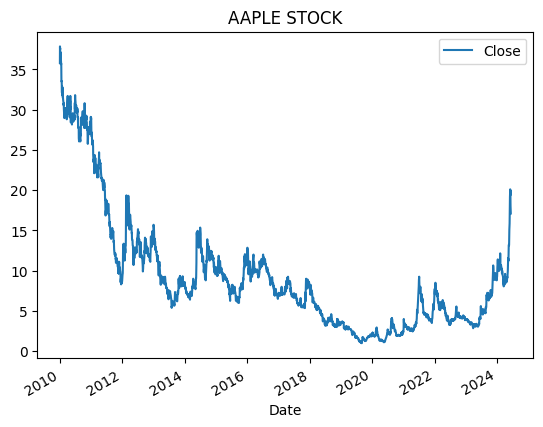

In [ ]:
#Download our Historical Data
df = yf.download("RTNPOWER.NS",
                 start = "2010-01-01",
                 end = date.today(),
                 progress=False,)

#Create a sample chart
df.plot(y="Close",title = "AAPLE STOCK")
plt.show()

Creating Technical Analysis Indicators and we are going to also plot them

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100)
Date,,,,,,,,,,,,
2010-05-31,28.900000,29.200001,28.750000,29.049999,29.049999,431063,88.705267,52.180732,47.770731,-55.772538,-71.624958,-73.866498
2010-06-01,29.299999,29.650000,29.000000,29.200001,29.200001,829618,93.278377,55.461821,49.209034,-21.833757,-42.745712,-63.142870
2010-06-02,29.350000,29.350000,28.900000,29.049999,29.049999,394210,51.541351,51.351155,47.791696,-40.544939,-59.580750,-69.807868
2010-06-03,29.100000,29.650000,28.950001,29.450001,29.450001,1135525,85.690060,60.466893,51.780154,-9.347628,-36.427198,-59.935027
2010-06-04,29.400000,29.850000,29.200001,29.549999,29.549999,463056,89.418404,62.515459,52.751930,13.701448,-19.828118,-51.912678


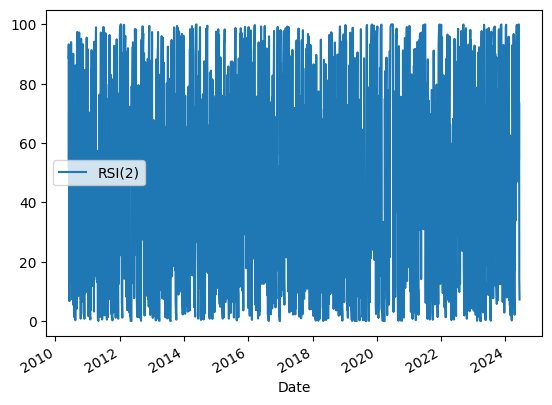

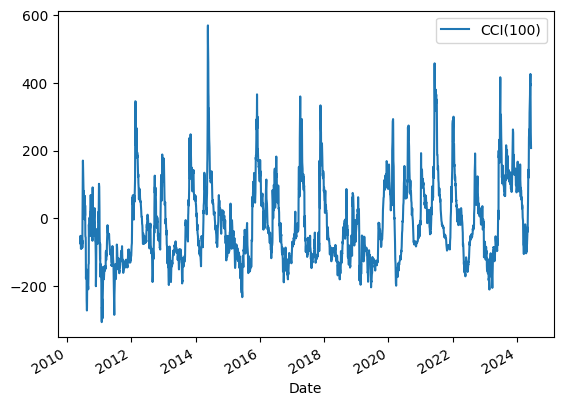

In [ ]:
try:
  import pandas_ta as ta
except:
  !pip install -q pandas_ta
  import pandas_ta as ta

df["RSI(2)"] = ta.rsi(df["Close"],length =2)
df["RSI(7)"] = ta.rsi(df["Close"],length =7)
df["RSI(14)"] = ta.rsi(df["Close"],length =14)
df["CCI(30)"] = ta.cci(close=df["Close"],length=30,high=df["High"],low=df["Low"])
df["CCI(50)"] = ta.cci(close=df["Close"],length=50,high=df["High"],low=df["Low"])
df["CCI(100)"] = ta.cci(close=df["Close"],length=100,high=df["High"],low=df["Low"])

#Drop NaN values
df = df.dropna()

#Create a plot showing some of our indicators
df.plot(y="RSI(2)")
df.plot(y="CCI(100)")

df.head()

Prepare our data labelling

What do we want to do over here?

When we place our trade: But at Open.

We want to close our trade: At the next day at open.

Formula:

Handling the returns this ways: Buy: Open(-1) - Closing: Open(-2)

We want to label our data in the following day.

BUY SIGNAL : Open(-2)> Open(-1)

SELL SIGNAL : Open(-2) < Open(-1)

Indiactors the current situation, and our labels take a look ahead of time to determine if we have a pattern.

In [ ]:
import numpy as np
df["LABEL"] = np.where(df["Open"].shift(-2)>(df["Open"].shift(-1)),"1","0")
df = df.dropna()
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100),LABEL
Date,,,,,,,,,,,,,
2010-05-31,28.900000,29.200001,28.750000,29.049999,29.049999,431063,88.705267,52.180732,47.770731,-55.772538,-71.624958,-73.866498,1
2010-06-01,29.299999,29.650000,29.000000,29.200001,29.200001,829618,93.278377,55.461821,49.209034,-21.833757,-42.745712,-63.142870,0
2010-06-02,29.350000,29.350000,28.900000,29.049999,29.049999,394210,51.541351,51.351155,47.791696,-40.544939,-59.580750,-69.807868,1
2010-06-03,29.100000,29.650000,28.950001,29.450001,29.450001,1135525,85.690060,60.466893,51.780154,-9.347628,-36.427198,-59.935027,0
2010-06-04,29.400000,29.850000,29.200001,29.549999,29.549999,463056,89.418404,62.515459,52.751930,13.701448,-19.828118,-51.912678,0
2010-06-07,29.200001,29.500000,28.650000,29.299999,29.299999,858754,38.831460,54.307383,50.036976,-31.729819,-58.180635,-68.009626,0
2010-06-08,29.150000,29.400000,28.700001,28.750000,28.750000,276614,11.128974,40.619003,44.598790,-53.963095,-77.803047,-77.114127,0
2010-06-09,29.000000,29.150000,28.400000,28.500000,28.500000,554657,6.750768,35.829810,42.345915,-82.049261,-100.466912,-89.928656,1
2010-06-10,28.700001,29.100000,28.549999,28.750000,28.750000,219524,47.812513,43.589429,45.320479,-66.016255,-86.102042,-84.201115,0


Creating a Neural Network

SkLearn

In [ ]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

#Fitting - Indicators and our labelling
X = df[df.columns[6:-1]].values
y= df["LABEL"].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam',max_iter=1000)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(" Train Data Accuracy")
print(classification_report(y_train,predict_train))

print("Testing Data Accuracy")
print(classification_report(y_test,predict_test))

 Train Data Accuracy
              precision    recall  f1-score   support

           0       0.61      0.97      0.75      1455
           1       0.53      0.06      0.10       968

    accuracy                           0.60      2423
   macro avg       0.57      0.51      0.42      2423
weighted avg       0.58      0.60      0.49      2423

Testing Data Accuracy
              precision    recall  f1-score   support

           0       0.60      0.95      0.73       621
           1       0.37      0.04      0.08       418

    accuracy                           0.59      1039
   macro avg       0.48      0.50      0.40      1039
weighted avg       0.50      0.59      0.47      1039



Backtesting our Model

Measure the returns obtained by trading our model

[]

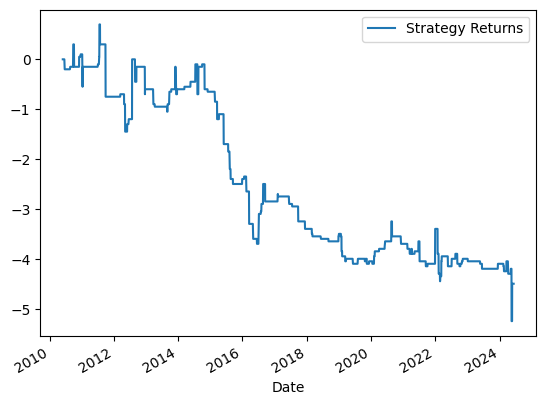

In [ ]:
df["Prediction"] = np.append(predict_train,predict_test)
df["Strategy Returns"] = np.where(df["Prediction"].eq("1"),df["Open"].shift(-2)-df["Open"].shift(-1),0)

df["Strategy Returns"] = df["Strategy Returns"].cumsum()

df.plot(y = "Strategy Returns")
plt.plot()

In [ ]:
prediction = df.iloc[-1]["Prediction"]

if prediction == "1":
  print("BUY/Today's return forecast : UP")
else:
  print("SELL/Today's return forecast : DOWN")

SELL/Today's return forecast : DOWN
